Thanks to https://www.kaggle.com/gaborfodor/seedlings-pretrained-keras-models

In [1]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
import numpy as np
import os
import pandas as pd
import seaborn as sns
from keras.applications import xception
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
start = dt.datetime.now()

I have added keras pretrained models library from https://www.kaggle.com/gaborfodor/keras-pretrained-models

In [4]:
!ls ../input/keras-pretrained-models/

Kuszma.JPG
imagenet_class_index.json
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
inception_v3_weights_tf_dim_ordering_tf_kernels.h5
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
resnet50_weights_tf_dim_ordering_tf_kernels.h5
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
xception_weights_tf_dim_ordering_tf_kernels.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


In [6]:
cache_dir = os.path.expanduser(os.path.join('~', '.keras'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [8]:
!cp ../input/keras-pretrained-models/xception* ~/.keras/models/

In [9]:
!ls ~/.keras/models

xception_weights_tf_dim_ordering_tf_kernels.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


Checking the dataset

In [10]:
!ls ../input/whale-categorization-playground

sample_submission.csv  test  train  train.csv


In [11]:
!ls ../input/whale-categorization-playground

sample_submission.csv  test  train  train.csv


For Labels we need to read second column of the train.csv file

In [12]:
df = pd.read_csv('../input/whale-categorization-playground/train.csv')

In [13]:
df.info

<bound method DataFrame.info of              Image         Id
0     00022e1a.jpg  w_e15442c
1     000466c4.jpg  w_1287fbc
2     00087b01.jpg  w_da2efe0
3     001296d5.jpg  w_19e5482
4     0014cfdf.jpg  w_f22f3e3
5     0025e8c2.jpg  w_8b1ca89
6     0026a8ab.jpg  w_eaad6a8
7     0031c258.jpg  new_whale
8     0035632e.jpg  w_3d0bc7a
9     0037e7d3.jpg  w_50db782
10    00389cd7.jpg  w_2863d51
11    0042dcc4.jpg  w_6dc7db6
12    0042ea34.jpg  w_968f2ca
13    00467ae9.jpg  w_fd1cb9d
14    004a97f3.jpg  w_60759c2
15    004c5fb9.jpg  w_ab6bb0a
16    005c57e7.jpg  w_79b42cd
17    006d0aaf.jpg  w_c9ba30c
18    0078af23.jpg  w_e6ec8ee
19    007c3603.jpg  new_whale
20    00863b8c.jpg  new_whale
21    008809b5.jpg  w_7e5cc5e
22    008baccf.jpg  w_ab6db0f
23    0091c92b.jpg  w_bc8d634
24    009dca38.jpg  w_b59c523
25    00a29f63.jpg  w_2850471
26    00aa021c.jpg  new_whale
27    00ab018e.jpg  w_51969d2
28    00ac0e86.jpg  w_4be8a3e
29    00acb5a9.jpg  w_c0cfd5b
...            ...        ...
9820  ff

In [14]:
Labels = df['Id']

In [15]:
len(Labels)

9850

In [16]:
data_dir = '../input/whale-categorization-playground/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

In [17]:
sample_submission.head(2)

,Image,Id
0,00029b3a.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
1,0003c693.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46


In [18]:
ImageNameList = df['Image']

In [19]:
!ls ../input/whale-categorization-playground/train/

00022e1a.jpg  33601fbc.jpg  675f9894.jpg  99b6e425.jpg	cc820eae.jpg
000466c4.jpg  336ade90.jpg  67622472.jpg  99c7570d.jpg	cc87cb0b.jpg
00087b01.jpg  336cf135.jpg  676935be.jpg  99c8948b.jpg	cc8eb5e2.jpg
001296d5.jpg  336f46ad.jpg  676d3681.jpg  99caa8ec.jpg	cc93d2f1.jpg
0014cfdf.jpg  3375722d.jpg  67758056.jpg  99cd3141.jpg	cc95eb5d.jpg
0025e8c2.jpg  3385ff66.jpg  677a1285.jpg  99ce339f.jpg	cc965a42.jpg
0026a8ab.jpg  338b0add.jpg  677c2196.jpg  99d708ca.jpg	cc979ad0.jpg
0031c258.jpg  33bdda74.jpg  6780a263.jpg  99e6f6a0.jpg	cc988a57.jpg
0035632e.jpg  33c25291.jpg  678fad91.jpg  99f9cdcf.jpg	cc9d5dac.jpg
0037e7d3.jpg  33c7a0ee.jpg  67b30544.jpg  9a0ed01d.jpg	cca06b1e.jpg
00389cd7.jpg  33cdc2a8.jpg  67c185bc.jpg  9a3b5779.jpg	cca9cd4e.jpg
0042dcc4.jpg  33db4a84.jpg  67c96540.jpg  9a3e3226.jpg	ccb8c993.jpg
0042ea34.jpg  33dd87cf.jpg  67ce9238.jpg  9a5c2cfd.jpg	ccc570bb.jpg
00467ae9.jpg  33e02767.jpg  67d13532.jpg  9a5e9be0.jpg	ccc9abf7.jpg
004a97f3.jpg  33e06290.jpg  67d226df.jpg  9a8275

I will count total number of images in the directory train 

In [32]:
!ls ../input/whale-categorization-playground/train/ -1 | wc -l
    

9850


Reference :- https://www.kaggle.com/lextoumbourou/humpback-whale-id-data-and-aug-exploration

In [36]:
import math
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

from tqdm import tqdm

%matplotlib inline

In [40]:
INPUT_DIR = '../input/whale-categorization-playground/'

In [41]:
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(f'{INPUT_DIR}/train/{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')


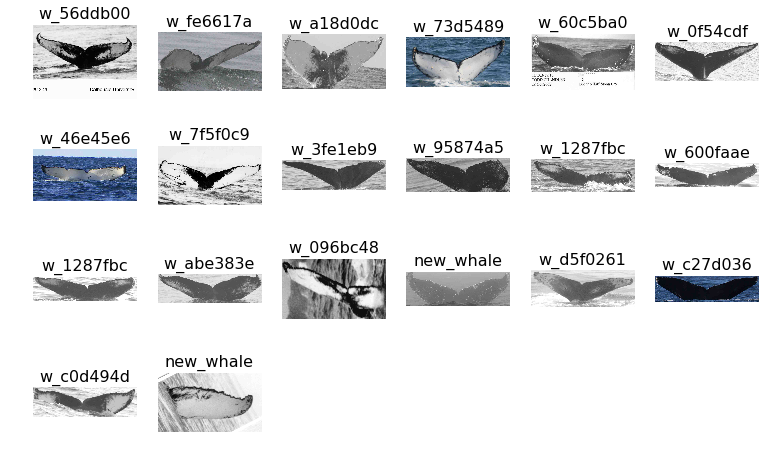

In [42]:
rand_rows = df.sample(frac=1.)[:20]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

Number of Categories ?

In [43]:
num_categories = len(df['Id'].unique())
     
print(f'Number of categories: {num_categories}')

Number of categories: 4251


So for 4251 categories have 9850 pics , so we need to add more data to it , i am following data augumentation technique